# 과거 10년 동안의 기상 데이터 분석하기
### 기상 자료 개방 포털 (https://data.kma.go.kr)

In [23]:
input_file = "data.csv"
output_file = "tem10y.csv"

# CSV 파일을 한 줄 씩 읽어오기
with open(input_file, "rt", encoding="EUC-KR") as fr:
    lines = fr.readlines()

In [24]:
# 기존의 데이터를 분리해서 가공하기
lines = ["연,월,일,기온,품질,균질\n"]+lines[5:]
lines = map(lambda v: v.replace('/',','), lines)
result = "".join(lines).strip()
# print(result)


In [25]:
import pandas as pd

with open(output_file, "wt", encoding="utf-8") as fw:
    fw.write(result)
    print("저장되었습니다.")

저장되었습니다.


In [26]:
import pandas as pd

df = pd.read_csv("tem10y.csv", encoding="utf-8")

In [27]:
# 기온 평균 구하기
# 10년 동안의 데이터를 집계해서 각 연월의 평균 기온을 구한다.
# 평균을 구하는 공식
# 평균 = 데이터의 합계 / 데이터의 수

# 날짜 별 기온을 리스트에 넣기
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row['월']), int(row['일']), float(row['기온']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 날짜 별 평균 기온 구하기
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))    

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

C:\ProgramData\Anaconda3\envs\paul\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\paul\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


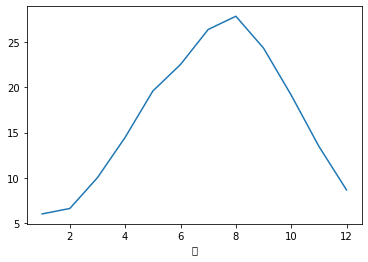

In [28]:
# 월 별 평균 기온 구하기
# 날짜별 평균은 DataFrame 자료구조의 데이터를 한 행씩 처리하여 값을 처리했다.
# Pandas 모듈을 이용하면 DataFrame의 groupby() 메소드를 사용해 간단히 집계할 수 있다.

g = df.groupby(['월'])['기온']
gg = g.sum() / g.count()
# print(gg)

import matplotlib.pyplot as plt



gg.plot()
plt.savefig("tmp-month-avg.png")
plt.show()

연
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 연, dtype: int64


C:\ProgramData\Anaconda3\envs\paul\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\paul\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)


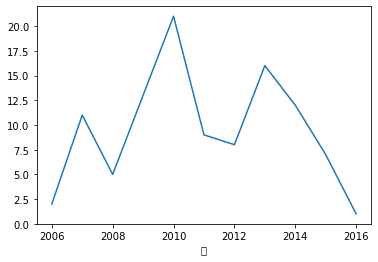

In [33]:
# 기온이 30도 넘는 날 구하기
# 평균 기온이 30도를 넘는 날이 한 해에 몇 번 있었는 지 알아보자.
'''
연
2006 2
2007 11
2008 5
'''

# 온도가 30도를 넘는 데이터 확인하기
hot_bool = (df["기온"] > 30)
# print(hot_bool)
# 데이터를 추출하기
hot = df[hot_bool]
cnt = hot.groupby(["연"])["연"].count()
print(cnt)
cnt.plot()
plt.savefig("tem-over30.png")
plt.show()